In [1]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("covid19.csv")

In [7]:
df.head()

Sno      Date State/UnionTerritory  ConfirmedIndianNational  \
0    1  30/01/20               Kerala                        1   
1    2  31/01/20               Kerala                        1   
2    3  01/02/20               Kerala                        2   
3    4  02/02/20               Kerala                        3   
4    5  03/02/20               Kerala                        3   

   ConfirmedForeignNational  Cured  Deaths  
0                         0      0       0  
1                         0      0       0  
2                         0      0       0  
3                         0      0       0  
4                         0      0       0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
Sno                         270 non-null int64
Date                        270 non-null object
State/UnionTerritory        270 non-null object
ConfirmedIndianNational     270 non-null int64
ConfirmedForeignNational    270 non-null int64
Cured                       270 non-null int64
Deaths                      270 non-null int64
dtypes: int64(5), object(2)
memory usage: 14.9+ KB


In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import datetime

In [13]:
df['Date']=pd.to_datetime(df.Date,dayfirst=True)


In [14]:
df

Sno       Date State/UnionTerritory  ConfirmedIndianNational  \
0      1 2020-01-30               Kerala                        1   
1      2 2020-01-31               Kerala                        1   
2      3 2020-02-01               Kerala                        2   
3      4 2020-02-02               Kerala                        3   
4      5 2020-02-03               Kerala                        3   
..   ...        ...                  ...                      ...   
265  266 2020-03-21    Jammu and Kashmir                        4   
266  267 2020-03-21               Ladakh                       13   
267  268 2020-03-21        Uttar Pradesh                       23   
268  269 2020-03-21          Uttarakhand                        3   
269  270 2020-03-21          West Bengal                        3   

     ConfirmedForeignNational  Cured  Deaths  
0                           0      0       0  
1                           0      0       0  
2                           0      0       0  
3                           0      0       0  
4                           0      0       0  
..                        ...    ...     ...  
265                         0      0       0  
266                         0      0       0  
267                         1      9       0  
268                         0      0       0  
269                         0      0       0  

[270 rows x 7 columns]

In [17]:
df["Confirmed"]= df["ConfirmedIndianNational"]+df["ConfirmedForeignNational"]

In [18]:
df=df.rename(columns={'Date':'date',
                     'State/UnionTerritory':'state',
                         'Deaths':'deaths'})

In [20]:
latest = df[df['date'] == max(df['date'])].reset_index()
latest_grouped = latest.groupby('state')['Confirmed','deaths'].sum().reset_index()
latest = df[df['date'] == max(df['date'])]
latest = latest.groupby('state')['Confirmed', 'deaths'].max().reset_index()

In [21]:
latest.head()

state  Confirmed  deaths
0  Andhra Pradesh          3       0
1      Chandigarh          1       0
2    Chhattisgarh          1       0
3           Delhi         26       1
4         Gujarat          7       0

In [22]:
latest.sort_values('Confirmed')

state  Confirmed  deaths
1          Chandigarh          1       0
2        Chhattisgarh          1       0
14         Puducherry          1       0
13             Odisha          2       0
6    Himachal Pradesh          2       0
0      Andhra Pradesh          3       0
17         Tamil Nadu          3       0
20        Uttarakhand          3       0
21        West Bengal          3       0
7   Jammu and Kashmir          4       0
11     Madhya Pradesh          4       0
4             Gujarat          7       0
15             Punjab         13       1
10             Ladakh         13       0
8           Karnataka         15       1
5             Haryana         17       0
16          Rajasthan         17       0
18          Telengana         21       0
19      Uttar Pradesh         24       0
3               Delhi         26       1
9              Kerala         40       0
12        Maharashtra         63       1

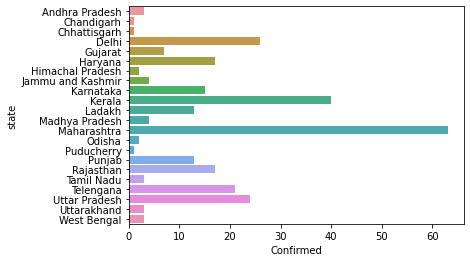

In [24]:
sns.barplot(x='Confirmed', y='state',  data=latest) 

In [26]:
df=df.groupby("date")["Confirmed"].sum()

In [27]:
df

date
2020-01-30      1
2020-01-31      1
2020-02-01      2
2020-02-02      3
2020-02-03      3
2020-02-04      3
2020-02-05      3
2020-02-06      3
2020-02-07      3
2020-02-08      3
2020-02-09      3
2020-02-10      3
2020-02-11      3
2020-02-12      3
2020-02-13      3
2020-02-14      3
2020-02-15      3
2020-02-16      3
2020-02-17      3
2020-02-18      3
2020-02-19      3
2020-02-20      3
2020-02-21      3
2020-02-22      3
2020-02-23      3
2020-02-24      3
2020-02-25      3
2020-02-26      3
2020-02-27      3
2020-02-28      3
2020-02-29      3
2020-03-01      3
2020-03-02      5
2020-03-03      6
2020-03-04     28
2020-03-05     30
2020-03-06     31
2020-03-07     34
2020-03-08     39
2020-03-09     46
2020-03-10     58
2020-03-11     60
2020-03-12     74
2020-03-13     81
2020-03-14     84
2020-03-15    110
2020-03-16    114
2020-03-17    137
2020-03-18    151
2020-03-19    173
2020-03-20    223
2020-03-21    283
Name: Confirmed, dtype: int64

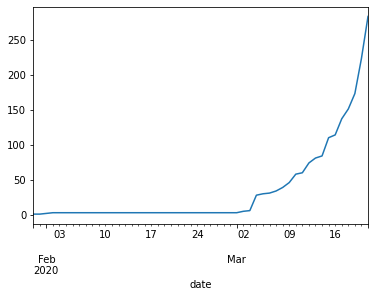

In [28]:
df.plot()

In [30]:
list=df.values

In [31]:
list

array([  1,   1,   2,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   5,   6,  28,  30,  31,  34,  39,
        46,  58,  60,  74,  81,  84, 110, 114, 137, 151, 173, 223, 283],
      dtype=int64)

In [32]:
len(list)

52

In [48]:
x=np.linspace(1,52,52)

In [49]:
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.])

In [50]:
y= list

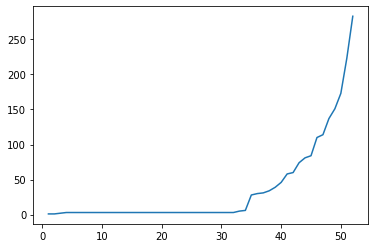

In [58]:
plt.plot(x,y)

In [54]:
from scipy.optimize import curve_fit 

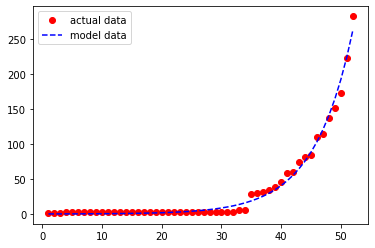

In [60]:
def test(x, a, b): 
    return a * np.exp(b * x) 
  
param, param_cov = curve_fit(test, x, y) 
  
  
ans = (param[0]*(np.exp(param[1]*x))) 
  
plt.plot(x, y, 'o', color ='red', label ="actual data") 
plt.plot(x, ans, '--', color ='blue', label ="model data") 
plt.legend() 
plt.show() 

In [61]:
#say now at 100 days

In [62]:
val= (param[0]*(np.exp(param[1]*100)))

In [63]:
val

453690.3909623882

In [64]:
#so number of cases at 100 days is the above value 